In [1]:
import shutil
import os
import zipfile

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../Datasets/list_attr_celeba.csv")
attributes = df.columns.tolist()
print(attributes)
print(f"{df['image_id']}, {df['Male']}") # 1 is Male and -1 is Female

['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']
0         000001.jpg
1         000002.jpg
2         000003.jpg
3         000004.jpg
4         000005.jpg
             ...    
202594    202595.jpg
202595    202596.jpg
202596    202597.jpg
202597    202598.jpg
202598    202599.jpg
Name: image_id, Length: 202599, dtype: object, 0        -1
1        -1
2         1
3        -1
4        -1
         ..
202594   -1
202595    1
202596    1
202597   -1
20259

In [3]:
df_filtered = df[['image_id', 'Male']]
print(df_filtered)

          image_id  Male
0       000001.jpg    -1
1       000002.jpg    -1
2       000003.jpg     1
3       000004.jpg    -1
4       000005.jpg    -1
...            ...   ...
202594  202595.jpg    -1
202595  202596.jpg     1
202596  202597.jpg     1
202597  202598.jpg    -1
202598  202599.jpg    -1

[202599 rows x 2 columns]


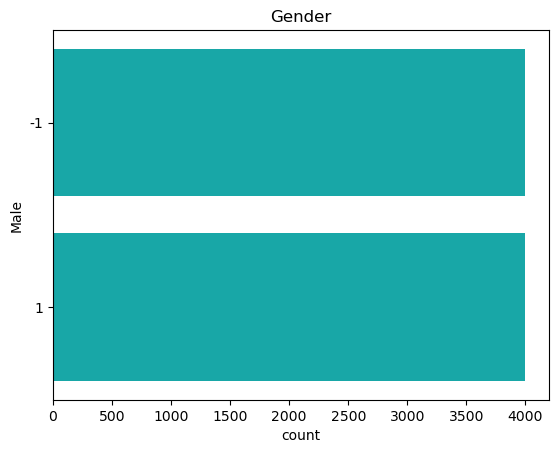

[ 1 -1]
Male
 1    4000
-1    4000
Name: count, dtype: int64


In [5]:
df_male = df_filtered[df_filtered['Male'] == 1]
df_female = df_filtered[df_filtered['Male'] == -1]

df_male_sampled = df_male.sample(min(len(df_male), 4000), random_state=42)
df_female_sampled = df_female.sample(min(len(df_female), 4000), random_state=42)

df_sampled = pd.concat([df_male_sampled, df_female_sampled])
df_sampled = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

plt.title('Gender')
sns.countplot(y=df_sampled['Male'], color="c")
plt.show()

print(df_sampled['Male'].unique())
print(df_sampled['Male'].value_counts())

In [6]:
source_folder = "../Datasets/img_align_celeba/img_align_celeba"
male_folder = "Male/"
female_folder = "Female/"

os.makedirs(male_folder, exist_ok=True)
os.makedirs(female_folder, exist_ok=True)

for _, row in df_sampled.iterrows():
    image_name = row['image_id']
    male = row['Male']
    
    source_path = os.path.join(source_folder, image_name)
    
    if male == 1:
        target_path = os.path.join(male_folder, image_name)
    else:
        target_path = os.path.join(female_folder, image_name)
    
    if os.path.exists(source_path):
        shutil.copy(source_path, target_path)
    else:
        print(f"File not found: {source_path}")

In [7]:
source_male_folder = "Male/"
source_female_folder = "Female/"

train_folder = "Train/"
val_folder = "Validate/"
test_folder = "Test/"

os.makedirs(os.path.join(train_folder, "Male"), exist_ok=True)
os.makedirs(os.path.join(train_folder, "Female"), exist_ok=True)
os.makedirs(os.path.join(val_folder, "Male"), exist_ok=True)
os.makedirs(os.path.join(val_folder, "Female"), exist_ok=True)
os.makedirs(os.path.join(test_folder, "Male"), exist_ok=True)
os.makedirs(os.path.join(test_folder, "Female"), exist_ok=True)

def move_images(images, source_folder, target_folder):
    for image in images:
        source_path = os.path.join(source_folder, image)
        
        if os.path.isfile(source_path):
            target_path = os.path.join(target_folder, image)
            shutil.copy(source_path, target_path)
        else:
            print(f"Skipped: {source_path} (It's a dir not a file)")

male_images = os.listdir(source_male_folder)
female_images = os.listdir(source_female_folder)

male_train, male_temp = train_test_split(male_images, test_size=0.2, random_state=42)
male_val, male_test = train_test_split(male_temp, test_size=0.5, random_state=42)

female_train, female_temp = train_test_split(female_images, test_size=0.2, random_state=42)
female_val, female_test = train_test_split(female_temp, test_size=0.5, random_state=42)

move_images(male_train, source_male_folder, os.path.join(train_folder, "Male"))
move_images(male_val, source_male_folder, os.path.join(val_folder, "Male"))
move_images(male_test, source_male_folder, os.path.join(test_folder, "Male"))

move_images(female_train, source_female_folder, os.path.join(train_folder, "Female"))
move_images(female_val, source_female_folder, os.path.join(val_folder, "Female"))
move_images(female_test, source_female_folder, os.path.join(test_folder, "Female"))